# Práctica Data Wrangling
Parte 1: Manejo de datos con Pandas

a- Carga el dataset en un DataFrame de Pandas y muestra las primeras 5 filas.

b- Muestra un resumen estadístico de las columnas numéricas del DataFrame.

c- Cuenta cuántos pasajeros sobrevivieron y cuántos no sobrevivieron.

d- Filtra el DataFrame para mostrar solo a los pasajeros de primera clase.

e- *Calcula la edad promedio de los pasajeros de cada clase. Usa groupby() para agrupar por clase y calcular la media de la columna Age.*

f- *Encuentra la cantidad de pasajeros por género. Usa groupby() para contar cuántos hombres y mujeres hay.*

g- Encuentra el pasajero más joven y el más viejo del dataset. Muestra su información completa.

h- Crea un nuevo dataset que se llame DatosGenerales y solo tenga el id, el nombre, el sexo y la edad de los pasajeros.

i- Propon 2 formas adicionales de explorar los datos

a- Carga el dataset en un DataFrame de Pandas y muestra las primeras 5 filas.

In [19]:
#Carga el dataset en un DataFrame de Pandas y muestra las primeras 5 filas.
import pandas as pd

# Cargar el dataset
df = pd.read_csv(r'C:\Users\Usuario\OneDrive\Documentos\Especialización en Big data y Analítica de Datos\VB1 Data Wrangling_003\Taller Practico-20250530T004139Z-1-001\Taller Practico\titanic.csv')

# Mostrar las primeras 5 filas
df.head(5)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [20]:
#Mostrar nombre de las columnas
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [21]:
#Forma del dataframe

df.shape
print(f"El DataFrame tiene {df.shape[0]} filas y {df.shape[1]} columnas.")

El DataFrame tiene 891 filas y 12 columnas.


In [22]:
#Información general del DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


b- Muestra un resumen estadístico de las columnas numéricas del DataFrame.



In [23]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


c- Cuenta cuántos pasajeros sobrevivieron y cuántos no sobrevivieron.

In [41]:
# Mostrar los pasajeros que sobrevivieron

sobrevivientes = (df["Survived"] == 1).sum()
sobrevivientes

no_sobrevivientes = (df["Survived"] == 0).sum()
no_sobrevivientes

print(f"Del total de pasajeros que eran: {len(df)}, el total de sobrevivientes: {sobrevivientes} y no sobrevivientes: {no_sobrevivientes}")


Del total de pasajeros que eran: 891, el total de sobrevivientes: 342 y no sobrevivientes: 549


d- Filtra el DataFrame para mostrar solo a los pasajeros de primera clase.

In [43]:
primera_clase = df[df["Pclass"] == 1]
print(f"La cantidad de los pasajeros en primera clase son: {len(primera_clase)}")

La cantidad de los pasajeros en primera clase son: 216


e- *Calcula la edad promedio de los pasajeros de cada clase. Usa groupby() para agrupar por clase y calcular la media de la columna Age.*

In [46]:
edad_promedio_por_clase = df.groupby("Pclass")["Age"].mean()
edad_promedio_por_clase

Pclass
1    38.233441
2    29.877630
3    25.140620
Name: Age, dtype: float64

f- *Encuentra la cantidad de pasajeros por género. Usa groupby() para contar cuántos hombres y mujeres hay.*

In [49]:
pasageros_por_genero = df.groupby("Sex").size()
pasageros_por_genero

Sex
female    314
male      577
dtype: int64

g- Encuentra el pasajero más joven y el más viejo del dataset. Muestra su información completa.

In [55]:
joven = df[df["Age"].min() == df["Age"]]
joven

viejo = df[df["Age"].max() == df["Age"]]
viejo

print(f"La edad mínima es {joven['Age'].values[0]} y la edad máxima es {viejo['Age'].values[0]}")

df_joven_viejo = pd.concat([joven, viejo], ignore_index=True)
df_joven_viejo


La edad mínima es 0.42 y la edad máxima es 80.0


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,804,1,3,"Thomas, Master. Assad Alexander",male,0.42,0,1,2625,8.5167,NaN,C
1,631,1,1,"Barkworth, Mr. Algernon Henry Wilson",male,80.00,0,0,27042,30.0000,A23,S


h- Crea un nuevo dataset que se llame DatosGenerales y solo tenga el id, el nombre, el sexo y la edad de los pasajeros.

In [64]:
# se crea el nuevo dataset y se renombra las columnas
datos_generales = df[["PassengerId", "Name", "Sex", "Age"]].rename(columns={"PassengerId": "id", "Name": "nombre", "Sex": "Sexo", "Age": "Edad"})

datos_generales


,id,nombre,Sexo,Edad
0,1,"Braund, Mr. Owen Harris",male,22.0
1,2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0
2,3,"Heikkinen, Miss. Laina",female,26.0
3,4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0
4,5,"Allen, Mr. William Henry",male,35.0
...,...,...,...,...
886,887,"Montvila, Rev. Juozas",male,27.0
887,888,"Graham, Miss. Margaret Edith",female,19.0
888,889,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN
889,890,"Behr, Mr. Karl Howell",male,26.0


i- Propon 2 formas adicionales de explorar los datos:

In [ ]:
#1. genera estadísticas de la edad por cada clase de boleto.
df.groupby('Pclass')['Age'].describe()


,count,mean,std,min,25%,50%,75%,max
Pclass,,,,,,,,
1,186.0,38.233441,14.802856,0.92,27.0,37.0,49.0,80.0
2,173.0,29.877630,14.001077,0.67,23.0,29.0,36.0,70.0
3,355.0,25.140620,12.495398,0.42,18.0,24.0,32.0,74.0


In [69]:
#2. Tasa de supervivencia por género
df.groupby('Sex')['Survived'].mean() * 100


Sex
female    74.203822
male      18.890815
Name: Survived, dtype: float64

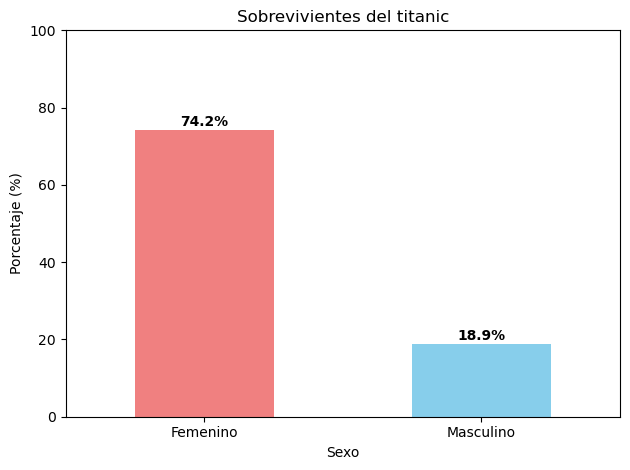

In [ ]:
# extra: Grafica de % de sobrevivientes por género

import matplotlib.pyplot as plt

# Reemplazar valores de la columna 'Sex'
df['Sex'] = df['Sex'].replace({'female': 'Femenino', 'male': 'Masculino'})

# Calcular porcentaje de sobrevivientes por género
survival_rates = df.groupby('Sex')['Survived'].mean() * 100

# Gráfico de barras
ax = survival_rates.plot(kind='bar', title='Sobrevivientes del titanic', color=['lightcoral', 'skyblue'])
plt.ylabel('Porcentaje (%)')
plt.xlabel('Sexo') 
plt.ylim(0, 100)

# Etiquetas de datos
for i, val in enumerate(survival_rates):
    plt.text(i, val + 1, f'{val:.1f}%', ha='center', fontweight='bold')

plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

